# Исследование данных сервиса аренды самокатов GoFast.
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

   **1) без подписки**
      
       - абонентская плата отсутствует;
       - стоимость одной минуты поездки — 8 рублей;
       - стоимость старта (начала поездки) — 50 рублей;
   **2) с подпиской Ultra**
      
       - абонентская плата — 199 рублей в месяц;
       - стоимость одной минуты поездки — 6 рублей;
       - стоимость старта — бесплатно.
**Описание данных.**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи —  таблица **users_go.csv**

Название столбца      | Расшифровка
:-------------:       |:-------------:
**user_id**           | уникальный идентификатор пользователя
**name**              | имя пользователя
**age**               |	возраст
**city**              |	город
**subscription_type** |	тип подписки (free, ultra)
		

Поездки — таблица **rides_go.csv** 

Название столбца      | Расшифровка
:-------------:       |:-------------:
**user_id**           | уникальный идентификатор пользователя
**distance**          | расстояние, которое пользователь проехал в текущей сессии (в метрах)
**duration**          | продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
**date**              |	дата совершения поездки

	

	
	
	
Подписки — таблица **subscriptions_go.csv**

Название столбца      | Расшифровка
:-------------:       |:-------------:
**subscription_type** |	тип подписки
**minute_price**      |	стоимость одной минуты поездки по данной подписке
**start_ride_price**  |	стоимость начала поездки
**subscription_fee**  |	стоимость ежемесячного платежа


**Цель исследования:**

1. Описать общую информацию о пользователях и поездках.
2. Подситать выручку от пользователей с подпиской и без.
3. Выполнить проверку некоторых гипотез:

    -тратят ли пользователи с подпиской больше времени на поездки
    
    -можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 31303 метров?
    
    -будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
    
**В ходе работы планируется:**

* Изучить общую информацию о полученных датафреймах
    
* Выполнить предобработку данных: по возможности заполнить пропуски при наличии; обработать дубликаты (если они есть); определить выбивающиеся и аномальные значения; изучить тип данных столбцов и выполнить преобразования типов данных, где это необходимо для дальнейшего анализа; добавить в таблицу новые столбцы (с месяцем аренды)

* В ходе проведения исследовательского анализа изучить основные параметры: частота встречаемости городов, соотношение пользователей с подпиской и без, возраст пользователей, расстояние за одну поездку, продолжительность одной поездки.

* Создать два датафрейма с информацией и пользователях с подпиской и без 

* Рассчитать помесячную выручку от каждого пользователя 

* Выполнить проверку гипотез

* Написать общий вывод


#### Шаг 1. Загрузка данных

In [1]:
# импорт нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# чтение файлов с данными
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
# снятие ограничений на количество отображаемых столбцов и количество символов в записи
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

##### Изучим общую информацию 

In [4]:
# вывод 10 первых строк таблицы data_users
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
# получение информации о пропусках и типах данных в таблице data_users
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице 5 столбцов, 1565 строк. Количество значений в столбцах одинаковое и равно количетсву строк. Значит, в данных нет пропущенных значений. Типы данных изменять не нужно.

In [6]:
# вывод 5 первых строк таблицы data_rides
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
# получение информации о пропусках и типах данных в таблице data_rides
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице 4 столбца, 18068 строк. Количество значений в столбцах одинаковое и равно количетсву строк. Значит, в данных нет пропущенных значений. Столбец **date** приведем к типу *datetime*.

In [8]:
# получение общей информации столбцов distance, duration таблицы data_rides
data_rides[['distance', 'duration']].describe()

,distance,duration
count,18068.000000,18068.000000
mean,3070.659976,17.805011
std,1116.831209,6.091051
min,0.855683,0.500000
25%,2543.226360,13.597563
50%,3133.609994,17.678395
75%,3776.222735,21.724800
max,7211.007745,40.823963


Средняя продолжительность поездок составляет около 18 минут со средней дистанцией в 3 км.

In [9]:
# вывод 5 первых строк таблицы data_subscriptions
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
# получение информации о пропусках и типах данных в таблице data_subscriptions
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице 4 столбца, 2 строки с опиманием тарифов. Пропущенных значений нет.

Пропущенных значений в таблицах нет. Соотвественно заниматься обработкой таких значений не нужно.

**Предварительно на этапе предобработки данных необходимо сделать следующее:**
- изменить тип данных столбца ` date ` таблицы **data_rides** на dateyime для дальнейшей работы с датой
- создать новый столбец с номером месяца на основе столбца date таблицы **data_rides**
- проверить таблицы на наличие дубликатов


#### Шаг 2. Предобработка данных

##### Приведение столбца date к типу даты pandas.

In [11]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [12]:
# проверка
data_rides[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 141.3 KB


##### Создание нового столбца с номером месяца на основе столбца date.

In [13]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month
data_rides.sample(10)

,user_id,distance,duration,date,month
5874,625,1368.093825,9.560313,2021-09-26,9
15500,1355,3208.072243,20.806487,2021-07-30,7
4026,434,3132.678574,24.663393,2021-06-30,6
16311,1411,2112.153096,9.224306,2021-04-18,4
8622,858,2723.611095,15.285256,2021-08-24,8
17688,1509,3596.025151,20.788075,2021-04-20,4
14580,1285,2457.175920,25.340812,2021-12-12,12
8533,851,3265.306670,16.997086,2021-05-08,5
16143,1399,1521.037785,18.605189,2021-09-09,9
15084,1322,5285.797316,33.821740,2021-03-23,3


In [14]:
data_rides['date'].max()

Timestamp('2021-12-30 00:00:00')

In [15]:
data_rides['date'].min()

Timestamp('2021-01-01 00:00:00')

В таблице *data_rides* представлены данные за период с 1 января 2021 года по 30 декабря 2021 года.

##### Проверка наличия дубликатов в датафреймах.

In [16]:
# подсчет явных дубликатов таблицы data_users
data_users.duplicated().sum()

31

In [17]:
# удаление повторяющиеся строк в таблице data_users и обновление индексов
data_users = data_users.drop_duplicates().reset_index(drop=True)

In [18]:
# подсчет явных дубликатов таблицы data_rides
data_rides.duplicated().sum()

0

Явные дубликаты в таблицах *data_rides* и *data_subscriptions* отсутсвуют.

In [19]:
# проверка неявных дубликатов в названиях городов таблицы data_users
data_users['city'].unique().tolist()

['Тюмень',
 'Омск',
 'Москва',
 'Ростов-на-Дону',
 'Краснодар',
 'Пятигорск',
 'Екатеринбург',
 'Сочи']

Неявные дубликаты отсутсвуют.

##### Проверка выбросов.

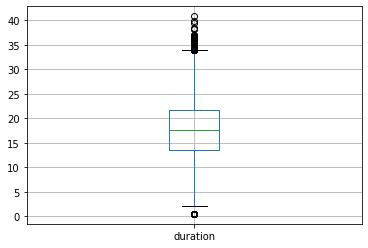

In [20]:
# проверка выбросов в продолжительности поездок
data_rides.boxplot('duration')
None

Продолжительность более 40 минту допустима, а вот менее 2 минут уже подозрительно. Возможно с самокатом были проблемы, поэтому поездка так быстро была окончена. Проверим расстояние, пройденное самокатами за время менее 2 минут. Если оно больше километра, то это уже аномально.

In [21]:
# срез данных с соответствующим условием и вывод 10 случайных строк
data_rides.query('duration < 2 and distance > 1000').sample(10)

,user_id,distance,duration,date,month
10295,978,4835.931553,0.5,2021-02-12,2
6570,704,4830.824371,0.5,2021-10-14,10
13608,1217,5905.524822,0.5,2021-09-27,9
14615,1287,5944.789947,0.5,2021-12-09,12
6883,726,4452.491518,0.5,2021-03-01,3
11559,1069,5780.316092,0.5,2021-04-06,4
9698,937,4169.066800,0.5,2021-12-12,12
7791,792,5353.189287,0.5,2021-11-06,11
15636,1364,4697.638430,0.5,2021-12-20,12
16309,1411,7211.007745,0.5,2021-04-15,4


Проверим, вдруг все поездки менее 2 минут имеют слишком большую дистанцию.

In [22]:
if data_rides.query('duration < 2 and distance > 1000')['user_id'].count() == \
    data_rides.query('duration < 2')['user_id'].count():
    print('Все поездки с продолжительностью менее 2 минут имеет дистанцию более 1000 м.')
else:
    print('Подумай еще')

Все поездки с продолжительностью менее 2 минут имеет дистанцию более 1000 м.


Все поездки, продолжительностью менее 2 минут имеют аномально большую дистанцию. Для дальнейшего анализа продолжительности и дитсанции поздок буду использовать срез данных с продолжительностью поездок более 2 минут

Проверим, есть ли выбросы в столбце дистанция поездки.

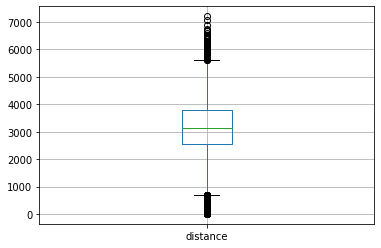

In [23]:
# проверка выбросов в дистанции поездок
data_rides.boxplot('distance')
None

Нижние выбросы могли возникнуть по разным причинам: неисправность с самокатом; люди могли взять аренду самоката, чтобы попробовать, но не впечатлились; планы изменились. Не будем трогать эти строки.

На этапе предобработки данных выполнено: 
- приведение значений столбца date к типу даты pandas;
- создание нового столбца с номером месяца на основе столбца **date**;
- проверка таблиц на наличие явных дубликатов. В таблице *data_users* обнаружено и удалено 31 строка с восстановлением индексов, в двух остальных таблицах явные дубликаты отсутствуют;
- проверка на наличие неявных дубликатов в названиях городов таблицы *data_users*. Неявные дубликаты не обнаружены;
- проверка выбросов и аномальных значений в столбцах **duration** и **distance** таблицы *data_rides*;
- удаление строк таблицы data_rides с продолжительностью поездки менее 2 минут из-за аномально большого расстояния.


#### Шаг 3. Исследовательский анализ данных

На данном этапе работы опишу и визуализирую общую информацию о пользователях и поездках:
 1. частота встречаемости городов;
 2. соотношение пользователей с подпиской и без подписки;
 3. возраст пользователей;
 4. расстояние, которое пользователь преодолел за одну поездку;
 5. продолжительность поездок.

##### Частота встречаемости городов

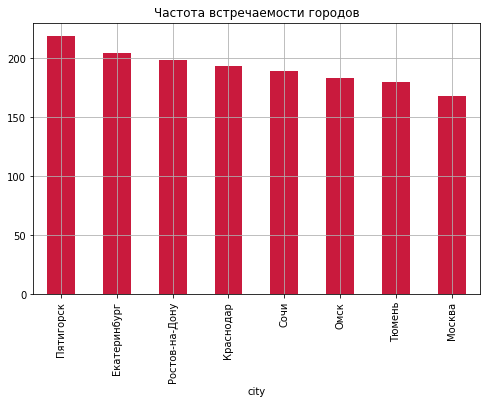

In [24]:
# группировка data_users по столбцу city и подсчет количества упоминаний каждого города
data_users_group = data_users.groupby('city')['city'].count().sort_values(ascending=False)
# построение диаграммы 
data_users_group.plot(y='city', kind='bar', grid=True, title='Частота встречаемости городов', figsize=(8,5), color=(0.79, 0.1, 0.24))
None

##### Cоотношение пользователей с подпиской и без подписки

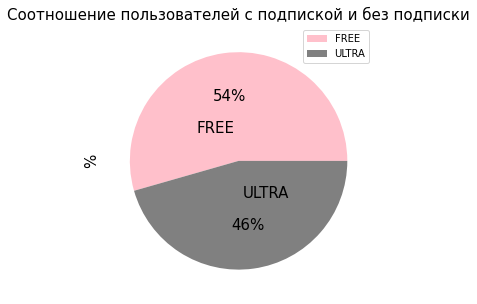

In [25]:
# создание сводной таблицы по типу подписки и подсчет количества пользователей для каждого типа подписки
data_users_subscription_type = data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
# добавление столбца с процентным отношением числа пользователей каждого типа подписки к общему числу пользователей
data_users_subscription_type['%'] = data_users_subscription_type['user_id'] / data_users.shape[0] 

labels = ['FREE', 'ULTRA']
# построение круговой диаграммы
data_users_subscription_type.plot(y='%', kind='pie',
                                  autopct='%1.0f%%',
                                  figsize=(8,5),
                                  colors = ['pink', 'grey'], 
                                  labels=labels,
                                  labeldistance=0.3,
                                  fontsize=15,
                                  )
plt.title('Cоотношение пользователей с подпиской и без подписки', fontsize=15)   
plt.ylabel('%', fontsize=15)

None

##### Возраст пользователей

In [26]:
# вывод общей информации по столбцу age таблицы data_users
data_users['age'].describe().to_frame()

,age
count,1534.000000
mean,24.903520
std,4.572367
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


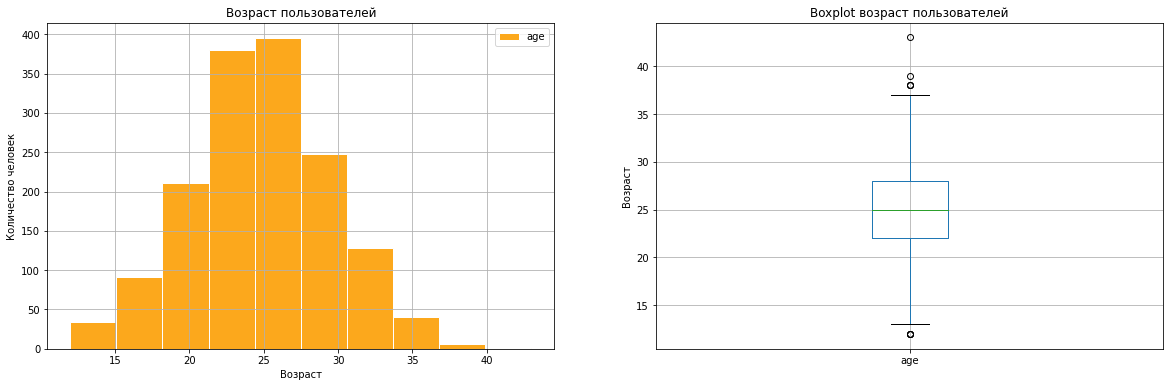

In [27]:
# построение гистограммы по столбцу age таблицы data_users
plt.figure(figsize = (20, 6))
data_users.plot(y='age', kind='hist', grid=True, ec='white', 
                color=(0.99, 0.66, 0.11), ax = plt.subplot(1, 2, 1), title='Возраст пользователей')
plt.ylabel('Количество человек')
plt.xlabel('Возраст')

data_users.boxplot('age', ax = plt.subplot(1, 2, 2))
plt.title('Boxplot возраст пользователей')
plt.ylabel('Возраст')
None

##### Расстояние, которое пользователь преодолел за одну поездку

В переменной data_rides_filtred создам срез данных с продолжительностью поездок более 2 минут.

In [28]:
data_rides_filtred = data_rides.query('duration > 2')

In [29]:
# вывод общей информации по столбцу duration таблицы data_rides
data_rides_filtred['distance'].describe().to_frame()

,distance
count,17973.000000
mean,3059.863833
std,1108.814612
min,0.855683
25%,2538.839628
50%,3129.029255
75%,3762.636244
max,7066.003772


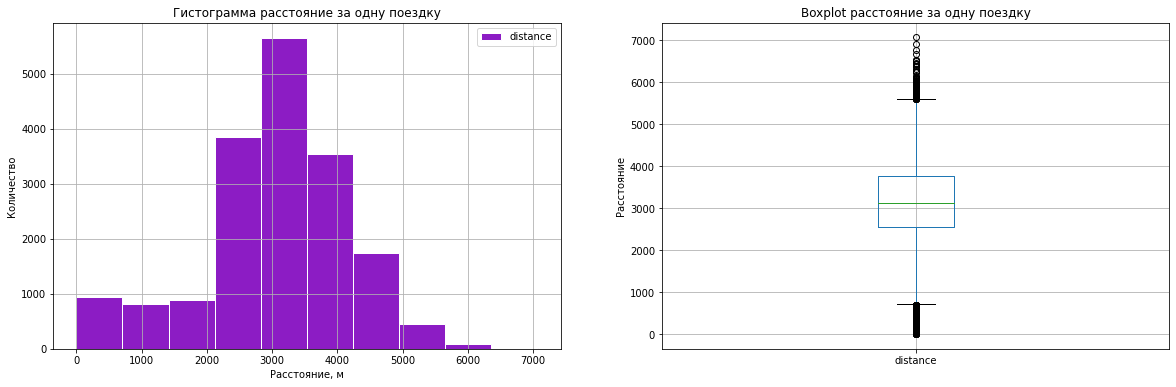

In [30]:
# построение гистограммы по столбцу distance таблицы data_rides
plt.figure(figsize = (20, 6))

data_rides_filtred.plot(y='distance', kind='hist', grid=True, ec='white', 
                color=(0.55, 0.11, 0.77), ax = plt.subplot(1, 2, 1), title='Гистограмма расстояние за одну поездку')
plt.ylabel('Количество')
plt.xlabel('Расстояние, м')

data_rides_filtred.boxplot('distance', ax = plt.subplot(1, 2, 2))
plt.title('Boxplot расстояние за одну поездку')
plt.ylabel('Расстояние')
None

##### Продолжительность поездок

In [31]:
# вывод общей информации по столбцу duration таблицы data_rides
data_rides_filtred['duration'].describe().to_frame()

,duration
count,17973.000000
mean,17.896480
std,5.975424
min,2.035632
25%,13.670439
50%,17.714122
75%,21.747016
max,40.823963


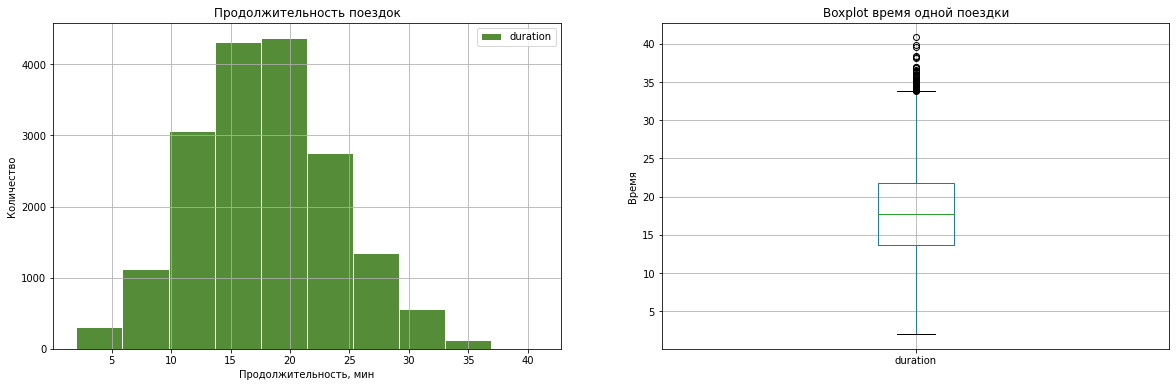

In [32]:
# построение гистограммы по столбцу duration таблицы data_rides
plt.figure(figsize = (20, 6))

data_rides_filtred.plot(y='duration', kind='hist', grid=True, ec='white', 
                color=(0.33, 0.55, 0.22), ax = plt.subplot(1, 2, 1), title='Продолжительность поездок')
plt.ylabel('Количество')
plt.xlabel('Продолжительность, мин')

data_rides_filtred.boxplot('duration', ax = plt.subplot(1, 2, 2))
plt.title('Boxplot время одной поездки')
plt.ylabel('Время')
None

**Выводы:**
1) Чаще всего самокаты в аренду берут в городе Пятигорск - более 200 раз, реже в Москве.

2) 54% пользователей не имеют подписки и используют поминутную оплату с дополнительной оплатой за старт поездки, 46% пользователей имеют подписку и не платят за старт.

3) Средний возраст пользователей сервиса составляет 25 лет, максимальный возраст - 43 года, минимальный - 12 лет. В основном сервсиом пользуются люди от 20 до 30 лет.

4) В среднем дистанция одной поездки на самокате составляет 3 км. Максимальная дистанция, которую преоделел пользователь за одну поездку - 7 км, минимальная - менее 1 м. Большинство пользователей за одну поездку преодолевают расстояние от 2,5 до 4 км.

5) Средняя продолжительность поездок составляет 18 минут. Минимальная продолжительность поездки - 2 минуты, максимальная - 40 минут. Основная часть поездок продолжительностью от 13 до 21 минуты.

#### Шаг 4. Объединение данных

На данном шаге выполню следующие действия:
1) Объединю данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуюсь методом merge().

2) Создам ещё два датафрейма из датафрейма: 
    
    - c данными о пользователях без подписки; 
    
    - с данными о пользователях с подпиской. 
    

3) Визуализирую информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Объединение данных о пользователях, поездках и подписках в один датафрейм

Для объединения данных воспользуюсь методом merge(): к таблице *data_rides* с данными о поездках пользователей буду присоединять таблицы *data_users* и *data_subscriptions*. Перед объединением проверю размер таблицы *data_rides*

In [33]:
data_rides.shape[0]

18068

In [34]:
# использование метода merge() дважды для объединения данных в один датафрейм, сохранение в переменную data
data = (data_rides.merge(data_users, on='user_id', how='left')).merge(data_subscriptions, on='subscription_type', how='left')
# вывод первых 10 строк
data.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


Проверю размер объединенного датафрейма

In [35]:
data.shape[0]

18068

Для дальнейшей работы с продолжительностью и расстоянием поездок, округлю значения столбца с продолжительностью поездок до большего целого числа (так как если поездка превысила целое число минут на несколько секунд, оплата будет произведена в сторону большего целого числа минут), а значения столбца с дистанцией поездок округлю до одного знака после запятой.

In [36]:
# импорт библиотеки math
import math
# округление значений продолжительности поездок до большего целого числа
data['duration'] = data['duration'].apply(math.ceil)
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [37]:
# округление значений продолжительности поездок до одного знака после запятой
data['distance'] = data['distance'].round(1)

##### Создание датафреймов c данными о пользователях без подписки и с подпиской

In [38]:
# использование метода query() для создания среза с данными о пользователях без подписки
data_free = data.query('subscription_type == "free"')
# вывод 10 случайных строк
data_free.sample(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
9686,937,2186.5,16,2021-04-10,4,Родион,22,Ростов-на-Дону,free,8,50,0
8496,849,4693.6,32,2021-01-12,1,Каролина,37,Тюмень,free,8,50,0
14542,1283,3771.6,18,2021-06-17,6,Дмитрий,14,Тюмень,free,8,50,0
14089,1251,1356.5,19,2021-09-02,9,Кирилл,25,Краснодар,free,8,50,0
16261,1407,2819.5,20,2021-11-17,11,Борис,26,Пятигорск,free,8,50,0
7391,762,790.5,9,2021-07-29,7,Ярослава,34,Ростов-на-Дону,free,8,50,0
14097,1252,3963.3,17,2021-02-21,2,Нелли,31,Краснодар,free,8,50,0
12625,1149,2752.6,18,2021-05-13,5,Самир,25,Екатеринбург,free,8,50,0
15453,1352,3017.2,14,2021-04-07,4,Евгения,30,Москва,free,8,50,0
9417,916,3692.0,15,2021-12-21,12,Арина,21,Ростов-на-Дону,free,8,50,0


In [39]:
# использование метода query() для создания среза с данными о пользователях с подпиской
data_ultra = data.query('subscription_type == "ultra"')
# вывод 10 случайных строк
data_ultra.sample(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
2383,253,1160.3,14,2021-06-03,6,Назар,23,Сочи,ultra,6,0,199
3682,396,2322.9,19,2021-05-21,5,Тимур,33,Екатеринбург,ultra,6,0,199
1777,193,383.3,7,2021-05-01,5,Регина,30,Сочи,ultra,6,0,199
1165,125,3005.9,27,2021-04-16,4,Андрей,20,Тюмень,ultra,6,0,199
3918,422,1811.0,18,2021-02-03,2,Кирилл,27,Сочи,ultra,6,0,199
4433,477,2069.6,18,2021-08-03,8,Стефания,26,Омск,ultra,6,0,199
2524,268,3126.0,18,2021-01-12,1,Виктория,24,Тюмень,ultra,6,0,199
3165,341,2974.2,12,2021-05-05,5,Василиса,23,Пятигорск,ultra,6,0,199
772,84,3121.1,19,2021-08-29,8,Анна,13,Екатеринбург,ultra,6,0,199
6052,649,3025.0,21,2021-08-17,8,София,34,Пятигорск,ultra,6,0,199


##### Информация о расстоянии и времени поездок для пользователей обеих категорий

***Выведем общую информацию и построим гистограммы по данным о дистанции и времени пользователей без подписки.***

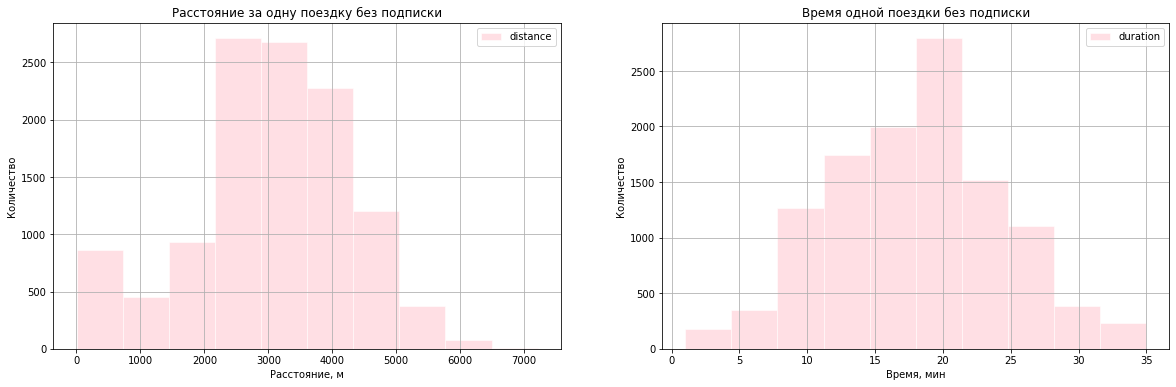

In [40]:
# построение гистограммы на основе данных о дистанции, пройденной пользователями без подписки за одну поездку
plt.figure(figsize = (20, 6))

data_free.plot(y='distance', kind='hist', grid=True, alpha=0.5, color='pink', ec='white', ax = plt.subplot(1, 2, 1))
plt.title('Расстояние за одну поездку без подписки')
plt.ylabel('Количество')
plt.xlabel('Расстояние, м')

# построение гистограммы на основе данных о времени, затраченном пользователями без подписки на одну поездку
data_free.plot(y='duration', kind='hist', grid=True, alpha=0.5, color='pink',ec='white', ax = plt.subplot(1, 2, 2))
plt.title('Время одной поездки без подписки' )
plt.ylabel('Количество')
plt.xlabel('Время, мин')
None

***Выведем общую информацию и построим гистограммы по данным о дистанции и времени пользователей с подпиской.***

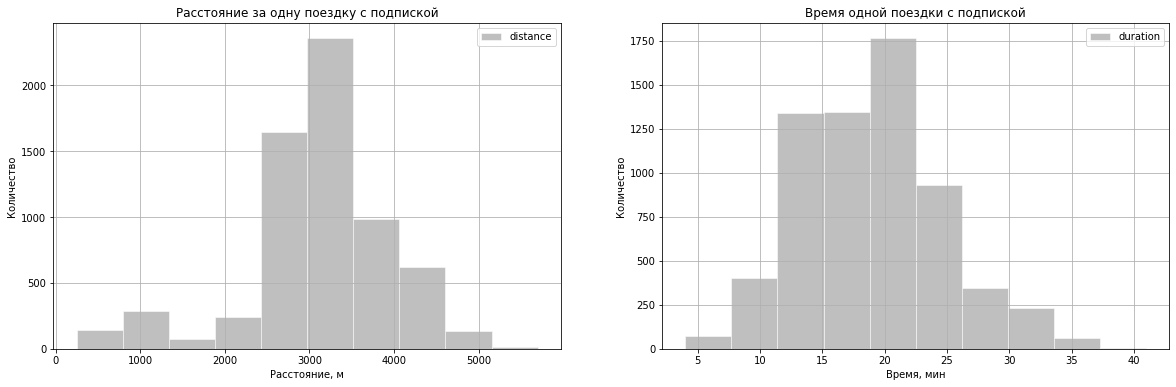

In [41]:
# построение гистограммы на основе данных о дистанции, пройденной пользователями с подпиской за одну поездку
plt.figure(figsize = (20, 6))

data_ultra.plot(y='distance', kind='hist', grid=True, alpha=0.5, color='grey', ec='white', ax = plt.subplot(1, 2, 1))
plt.title('Расстояние за одну поездку c подпиской')
plt.ylabel('Количество')
plt.xlabel('Расстояние, м')

# построение гистограммы на основе данных о времени, затраченном пользователями с подпиской на одну поездку
data_ultra.plot(y='duration', kind='hist', grid=True, alpha=0.5, color='grey',ec='white', ax = plt.subplot(1, 2, 2))
plt.title('Время одной поездки c подпиской' )
plt.ylabel('Количество')
plt.xlabel('Время, мин')

None

**Расстояние, пройденное пользователями с подпиской и без нее за одну поездку.**
- средняя дистанция одной поездки пользователей без подписки составляет 3 км, а средняя дистанция пользователей с подпиской составляет 3 км 100 м.
- минимальная дистанция одной поездки пользователей без подписки составляет менее 1 м, а минимальная дистанция пользователей с подпиской составляет 244 м. 
- максимальная дистанция одной поездки пользователей без подписки составляет 7 км, а максимальная дистанция пользователей с подпиской составляет 5 км 700 м.
- большинство пользователей без подписки за одну поездку преодолевают расстояние от 2.4 до 4 км, а пользователи с подпиской чаще всего используют сервис по аренде самокатов для преодоления расстояний от 2.8 до 3.6 км. 

**Длительность одной поездки пользователей с подпиской и без нее.**
- средняя продолжительность одной поездки пользователей без подписки составляет 18 минут, что не сильно отличается от средней продолжительности одной поездки пользователей с подпиской, которая составляет 19 минут
- минимальные продолжительности одной поездки пользователей без подписки составляет 1 минуту, а пользователей с подпиской 4 минуты.
- максимальные продолжительности одной поездки пользователей без подписки и с подпиской уже заметно отличаются и составляют соответственно 35 и 41 минуту
- большая часть пользователей без подписки затрачивает на одну поездку от 14 до 22 минут аналогично пользователям без подписки.


**На данном этапе работы проделано следующее:**
1) Объединены данные о пользователях, поездках и подписках в один датафрейм. 

2) Созданы два датафрейма c данными о пользователях без подписки и с данными о пользователях с подпиской. 
    
3) Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий и сделаны соответсвующие выводы.


#### Шаг 5. Подсчёт выручки

На данном этапе работы выполню следующее:

1) Создам датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из предыдущего шага: найду суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;

2)  В этот же датафрейм добавлю столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обращусь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26 (выполнено в шаге 4.1.)


##### Создание датафрейм с агрегированными данными о поездках 

In [42]:
# вывод названий столбца таблицы data
data.columns.tolist()

['user_id',
 'distance',
 'duration',
 'date',
 'month',
 'name',
 'age',
 'city',
 'subscription_type',
 'minute_price',
 'start_ride_price',
 'subscription_fee']

In [43]:
# создание сводной таблицы в переменной data_inform с данными о суммарном расстояние, количестве поездок 
# и суммарном время для каждого пользователя за каждый месяц
data_inform = data.pivot_table(index=['user_id',
 'month',
 'name',
 'age',
 'city',
 'subscription_type',
 'minute_price',
 'start_ride_price',
 'subscription_fee'],
values=['distance', 'duration'], aggfunc={'distance': 'sum', 'duration': ['sum', 'count']})

# переименование столбцов с суммарной дистанцией, количеством и времением поездок
data_inform.columns = ['distance_sum', 'rides_count', 'duration_sum']

# переиндексирую строки
data_inform = data_inform.reset_index()

# вывод 10 случайных строк
data_inform.head(10)

,user_id,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,rides_count,duration_sum
0,1,1,Кира,22,Тюмень,ultra,6,0,199,7027.5,2,42
1,1,4,Кира,22,Тюмень,ultra,6,0,199,754.2,1,7
2,1,8,Кира,22,Тюмень,ultra,6,0,199,6723.5,2,46
3,1,10,Кира,22,Тюмень,ultra,6,0,199,5809.9,2,32
4,1,11,Кира,22,Тюмень,ultra,6,0,199,7003.5,3,56
5,1,12,Кира,22,Тюмень,ultra,6,0,199,6751.6,2,28
6,2,3,Станислав,31,Омск,ultra,6,0,199,10187.7,3,63
7,2,4,Станислав,31,Омск,ultra,6,0,199,6164.4,2,40
8,2,6,Станислав,31,Омск,ultra,6,0,199,3255.3,1,14
9,2,7,Станислав,31,Омск,ultra,6,0,199,6780.7,2,48


##### Добавление столбца с помесячной выручкой, которую принёс каждый пользователь

Создам функцию для подсчета помесячной выручки от каждого пользователя.

Для того, чтобы узнать помесячную выручку, надо сложить: 

- помесячную оплату за подписку (для пользователей без подписки помесячная оплата равна 0);

- произведение количества поездок и стоимости старта одной поездки ( для пользователей с подпиской старт бесплатный, поэтому данное произведение будет равно 0);

- произведение длительности поездок (в минутах) и стоимости одной минуты (в рублях).

In [44]:
# создание функции income 
def income(row):
    subscription = row['subscription_fee']
    ride_price = row['start_ride_price']
    count = row['rides_count']
    duration = row['duration_sum']
    minute_price = row['minute_price']
    v = subscription + ride_price*count + duration*minute_price
    return v

# добавление столбца monthly_income в таблицу data_inform 
# с результатом работы функции по подсчету месячного дохода по каждому пользователю
data_inform['monthly_income'] = data_inform.apply(income, axis=1)

# вывод таблицы
data_inform.head(10)

,user_id,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,rides_count,duration_sum,monthly_income
0,1,1,Кира,22,Тюмень,ultra,6,0,199,7027.5,2,42,451
1,1,4,Кира,22,Тюмень,ultra,6,0,199,754.2,1,7,241
2,1,8,Кира,22,Тюмень,ultra,6,0,199,6723.5,2,46,475
3,1,10,Кира,22,Тюмень,ultra,6,0,199,5809.9,2,32,391
4,1,11,Кира,22,Тюмень,ultra,6,0,199,7003.5,3,56,535
5,1,12,Кира,22,Тюмень,ultra,6,0,199,6751.6,2,28,367
6,2,3,Станислав,31,Омск,ultra,6,0,199,10187.7,3,63,577
7,2,4,Станислав,31,Омск,ultra,6,0,199,6164.4,2,40,439
8,2,6,Станислав,31,Омск,ultra,6,0,199,3255.3,1,14,283
9,2,7,Станислав,31,Омск,ultra,6,0,199,6780.7,2,48,487


#### Шаг 6. Проверка гипотез

На данном этапе работы сформулирую и проверю некоторые гипотезы.

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

1) Проверю, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверю, можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

3) Проверю гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

4) Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Выясню, какой тест понадобился бы для проверки этой гипотезы?


##### Проверю, тратят ли пользователи с подпиской больше времени на поездки?

Проверим гипотезу о равенстве средних двух независимых гениральных совокупностей, используя t-тест. Для того, чтобы применять этот тест, проверим условия:

1) Гениральные совокупности не зависят друг от друга (выполнено, так как это две совокупности со значениями длительности поездок пользователей с подпиской и без нее)


2) Дисперсии рассматриваемых генеральных совокупностей равны.

Дисперсии двух гениральных совокупностей неизвестны и гениральные совокупности разного объема, поэтому есть основания считать, что диспресии могут различаться. В связи с этим используем параметр equal_var=False.

Нулевая гипотеза заключается в том, что средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки. 

Альтернативаня гипотеза заключается в том, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

In [45]:
alpha = .05
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=False, alternative='greater')

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.1814679253701353e-36
Отвергаем нулевую гипотезу


p-value получилось значительно меньше выбранного уровня 𝛼=0.05. Нулевая гипотеза отвергнута, значит, есть основания говорить о том, что пользователи с подпиской могут быть «выгоднее» для компании.

##### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Проверим гипотезу, что среднее расстояние, которое проезжает пользователь с подпиской не превышает 3130 метров, используя t-тест на проверку, равно ли истинное среднее генеральной совокупности заданному числу.

Нулевая гипотеза заключается в том, что средняя дистанция одной поездки пользователей с подпиской не превышает 3130 метров.

Альтернативаня гипотеза заключается в том, что средняя дистанция одной поездки пользователей с подпиской превышает 3130 метров.


In [46]:
max_distance = 3130

#alpha = .05

results = st.ttest_1samp(data_ultra['distance'], max_distance, alternative='greater')

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.9195427368335852
Не получилось отвергнуть нулевую гипотезу


p-value получилось больше выбранного уровня 𝛼=0.05. Нулевая гипоетеза не отвергнута, значит, нет оснований утверждать, что расстояние, которое преодолевает пользователь с подпиской за одну поездку превышает 3130 метров.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Для проверки этой гипотезы создадим таблицы с данными о помесячной выручке от пользователей с подпиской и без нее, используя срезы таблицы *data_inform*

In [62]:
data_inform_free = data_inform.query('subscription_type == "free"')
data_inform_free.head(10)

,user_id,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,rides_count,duration_sum,monthly_income
4533,700,1,Айдар,22,Омск,free,8,50,0,2515.7,1,15,170
4534,700,2,Айдар,22,Омск,free,8,50,0,13446.6,5,89,962
4535,700,3,Айдар,22,Омск,free,8,50,0,3798.3,1,19,202
4536,700,4,Айдар,22,Омск,free,8,50,0,2984.6,1,16,178
4537,700,6,Айдар,22,Омск,free,8,50,0,5927.6,2,29,332
4538,700,7,Айдар,22,Омск,free,8,50,0,4399.2,2,21,268
4539,700,8,Айдар,22,Омск,free,8,50,0,4071.7,1,17,186
4540,700,10,Айдар,22,Омск,free,8,50,0,6322.6,2,44,452
4541,700,11,Айдар,22,Омск,free,8,50,0,8735.8,3,32,406
4542,701,1,Иван,31,Екатеринбург,free,8,50,0,2676.5,1,18,194


In [48]:
data_inform_ultra = data_inform.query('subscription_type == "ultra"')
data_inform_ultra.sample(10)

,user_id,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,rides_count,duration_sum,monthly_income
3705,568,8,Назар,27,Екатеринбург,ultra,6,0,199,3519.0,1,18,307
2081,318,9,Степан,35,Москва,ultra,6,0,199,5204.9,2,31,385
1769,270,1,Егор,26,Тюмень,ultra,6,0,199,4151.1,1,15,289
483,76,11,Артур,17,Ростов-на-Дону,ultra,6,0,199,3137.1,1,16,295
3197,492,1,Ева,23,Омск,ultra,6,0,199,2584.5,1,14,283
2490,382,2,Марина,26,Тюмень,ultra,6,0,199,3860.0,1,24,343
2100,321,7,Артемий,22,Москва,ultra,6,0,199,3732.3,1,31,385
601,93,1,Вадим,25,Пятигорск,ultra,6,0,199,9600.0,3,44,463
2620,402,4,Эльмира,21,Екатеринбург,ultra,6,0,199,6733.2,2,43,457
3044,467,6,Евгения,17,Екатеринбург,ultra,6,0,199,4115.4,2,26,355


Проверим гипотезу о равенстве средних двух независимых гениральных совокупностей, используя t-тест. Для того, чтобы применять этот тест, проверим условия:

1) Гениральные совокупности не зависят друг от друга (выполнено, так как это две совокупности со значениями помесячной выручки от пользователей с подпиской и без нее)

2) Дисперсии рассматриваемых генеральных совокупностей равны.

Дисперсии двух гениральных совокупностей неизвестны и гениральные совокупности разного объема, поэтому есть основания считать, что диспресии могут различаться. В связи с этим используем параметр equal_var=False.

Нулевая гипотеза заключается в том, что средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручке пользователей без подписки.

Альтернативаня гипотеза заключается в том, что средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.


In [52]:
alpha = .05
results = st.ttest_ind(data_inform_ultra['monthly_income'], data_inform_free['monthly_income'], 
                       equal_var=False, alternative='greater')

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 8.874140893976874e-40
Отвергаем нулевую гипотезу


p-value получилось значительно меньше выбранного уровня 𝛼=0.05. Нулевая гипотеза отвергнута, значит, есть основания говорить о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

##### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение.

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** В таком случае я анализировала бы одну генеральную совокупность, с которой произошли какие-то изменения, то есть я бы проверяла, равны ли средние совокупности до и после этого изменения. 

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых выборок, применила бы t-тест для зависимых выборок, то есть метод scipy.stats.ttest_rel() в Pandas.

Передала бы два параметра: наборы данных до и после изменения. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

***Вывод***

Исследованы данные сервиса аренды самокатов, содержащие информацию о некоторых пользователях из нескольких городов, а также об их поездках и используемых тарифах. 

**На этапе предобработки данных было выполнено:**

* создание нового столбца с номером месяца на основе столбца **date**;
* проверка таблиц на наличие явных и неявных дубликатов. В таблице *data_users*  удалена 31 строка с явными дубликатами;
* удаление строк таблицы *data_rides* с продолжительностью поездки менее 2 минут из-за аномально большого расстояния.

**На этапе исследовательского анализа данных было выявлено:**

    - Чаще всего самокаты в аренду берут в городе Пятигорск - более 200 раз, реже в Москве.

    - 54% пользователей не имеют подписки, 46% пользователей имеют подписку.

    - Средний возраст пользователей сервиса составляет 25 лет. В основном сервсиом пользуются люди от 20 до 30 лет.

    - В среднем дистанция одной поездки на самокате составляет 3 км. Максимальная дистанция, которую преодолел пользователь за одну поездку - 7 км, минимальная - менее 1 м. 

    - Средняя продолжительность поездок составляет 18 минут. Минимальная продолжительность поездки - 2 минуты, максимальная - 40 минут. Основная часть поездок продолжительностью от 13 до 21 минуты.

**Для дальнейшего анализа и проверки гипотез также было выполнено:**

1) Объединены данные о пользователях, поездках и подписках в один датафрейм. 

2) Созданы два датафрейма c данными о пользователях без подписки и с данными о пользователях с подпиской. 

3) Проведен исследовательский анализ данных пользователей с подпиской и без, в результате которого сделаны следующие выводы:

    - Среднее расстояние, пройденное пользователями с подпиской, незначительно превышает среднее расстояние, пройденное пользователями без подписки несмотря на то, что максимальная дистанция у пользователей без подписки больше. 

    Это может быть связано с тем, что большое количество пользователей без подписки преодолевают расстояние менее 800 м, , это могут быть пользователи, которые впервые решили опробовать данный сервис и по различным причинам поездка могла быть совершена на короткую дистанцию. При этом максимальная дальность поездок у пользователей без подписки выше,чем у пользователей с подпиской.

    - Средняя продолжительность поездок пользователей с подпиской также незначительно превышает среднюю продолжительность поездок пользователей без подписки. 

    Такая ситуация могла возникнуть по причине того, что около 1000 поездок пользователей без подписки не превышает 10 минут, в то время, как среди пользователей с подпиской таких поездок менее 500 и к тому же максимальная продолжительность поездок выше.

4) Добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

5) Проверены следующие гипотезы:

    1) тратят ли пользователи с подпиской больше времени на поездки?
    
    Нулевая гипотеза о равенстве средней продолжительности поездки пользователей с подпиской и без нее отвергнута, значит, есть основания говорить о том, что пользователи с подпиской могут быть «выгоднее» для компании.

    2) можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    
    Нулевая гипоетеза о том, что что средняя дистанция одной поездки пользователей с подпиской не превышает 3130 метров не отвергнута, значит, нет оснований утверждать, что расстояние, которое преодолевает пользователь с подпиской за одну поездку превышает 3130 метров.
    
    3) будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
    
    Нулевая гипотеза о равенсвте средней помесячной выручке от пользователей с подпиской и средней помесячной выручке пользователей без подписки отвергнута, значит, есть основания говорить о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
    
**Рекомендации**

- В Москве реже всего используют данный сервис по аренде самокатов, возможно из-за большой конкуренции. Стоит увеличить количество арендуемых самокатов.

- Дальность поездок у пользователей без подписки выше,чем у пользователей с подпиской. И пользователей без подписки 54%. Возможно стоит подумать о привлечении постоянных пользователей без подписки и предоставить пробный бесплатный период подписки.

- Среди пользователей без подписки совершается большое количество поездок с дистанцией менее 1 км и продолжительностью менее 5 минут. Для новых пользователей сервиса можно ввести бесплатные пробные минуты.


**Чек-лист готовности проекта**

- [x] открыты файлы
- [x] файлы изучены 
- [x] столбец date приведен к типу даты pandas
- [x] создан новый столбец с номером месяца на основе столбца date
- [x] определены пропущенные значения
- [x] заполнены пропущенные значения там, где это возможно
- [x] есть пояснение, какие пропущенные значения обнаружены
- [x] проверено наличие дубликатов
- [x] описана и визуализирована общая информация о пользователях и поездках:
        - частота встречаемости городов
        - соотношение пользователей с подпиской и без подписки
        - возраст пользователей
        - расстояние, которое пользователь преодолел за одну поездку
        - продолжительность поездок
- [x]  объединены данные о пользователях, поездках и подписках в один датафрейм
- [x]  созданы ещё два датафрейма:
        - c данными о пользователях без подписки
        - с данными о пользователях с подпиской
- [x]  визуализирована информацию о расстоянии и времени поездок для пользователей обеих категорий
- [x]  найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
- [x]  добавлен столбец с помесячной выручкой, которую принёс каждый пользователь
- [x]  проверены гипотезы:
        1) тратят ли пользователи с подпиской больше времени на поездки?
        2) можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
        3) будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки